### imports

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\mario\AppData\Roaming\Python\Python310\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
data = pd.read_excel("ODP_PO_STARYM.xlsx")
data

,Sygnatura czasowa,Grupa wiekowa,Województwo\n(Obecnego zamieszkania),Czy masz związek z innymi regionami kraju?,Powiat,'Brama' w znaczeniu 'klatka schodowa','Ban' w znaczeniu 'autobus','Siupa' w znaczeniu 'kiepska sytuacja','Juma' w znaczeniu 'kradzież (zwłaszcza owoców z cudzego sadu)','Nasyp' w znaczeniu 'wiadukt kolejowy na hałdzie' (szerzej niż odnośnie nasypu na Bogusławskiego),...,'Facetka' w znaczeniu 'kobieta','Fleja' w znaczeniu 'brudas',"'Graba' w znaczeniu 'ręka, dłoń'",'Gryzmoły' w znaczeniu 'niestaranne pismo','Hajtać się' w znaczeniu 'brać ślub','Handryczyć się' w znaczeniu 'sprzeczać się','Het i nazad' w znaczeniu 'w tę i z powrotem',"'I wsio' w znaczeniu 'i tyle, koniec'",'Iść z buta' w znaczeniu 'iść pieszo','Prześcielić' w znaczeniu 'pościelić'
0,2024-04-23 12:38:43.058,21-30,pomorskie,"województwo warmińsko-mazurskie (Elbląg, Olszt...",NaN,"Znam, ale nie używam",Nie znam,Nie znam,"Znam, ale nie używam",Nie znam,...,"Znam, ale nie używaam",Znam i używam,Nie znam,Znam i używam,Znam i używam,Nie znam,Nie znam,Znam i używam,Znam i używam,Nie znam
1,2024-04-23 12:40:21.505,21-30,wielkopolskie,dolnośląskie,NaN,Znam i używam,Nie znam,Nie znam,"Znam, ale nie używam","Znam, ale nie używam",...,"Znam, ale nie używaam",Znam i używam,"Znam, ale nie używaam",Znam i używam,"Znam, ale nie używaam",Nie znam,Nie znam,"Znam, ale nie używaam",Znam i używam,Nie znam
2,2024-04-23 12:45:28.268,21-30,pomorskie,NaN,NaN,"Znam, ale nie używam",Nie znam,Nie znam,"Znam, ale nie używam",Nie znam,...,Znam i używam,Znam i używam,Znam i używam,Znam i używam,Znam i używam,Nie znam,"Znam, ale nie używam",Znam i używam,Znam i używam,"Znam, ale nie używam"
3,2024-04-23 12:45:56.605,21-30,zachodniopomorskie,NaN,NaN,Nie znam,Nie znam,Nie znam,Nie znam,Nie znam,...,Znam i używam,Znam i używam,"Znam, ale nie używam",Znam i używam,Znam i używam,Nie znam,Nie znam,Znam i używam,Znam i używam,Nie znam
4,2024-04-23 12:46:55.051,21-30,pomorskie,NaN,NaN,Nie znam,Nie znam,Nie znam,"Znam, ale nie używam","Znam, ale nie używam",...,"Znam, ale nie używam","Znam, ale nie używam",Nie znam,Znam i używam,Znam i używam,Nie znam,Nie znam,"Znam, ale nie używam",Znam i używam,Nie znam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3217,2024-05-03 08:45:21.029,51-60,dolnośląskie,Do 20go roku zycia mieszkalem w Lodzi,wrocławski,Znam i używam,Nie znam,Nie znam,Znam i używam,Znam i używam,...,"Znam, ale nie używam","Znam, ale nie używam","Znam, ale nie używam",Znam i używam,"Znam, ale nie używam","Znam, ale nie używam",Nie znam,"Znam, ale nie używam",Znam i używam,Nie znam
3218,2024-05-03 18:41:08.542,<20,wielkopolskie,NaN,NaN,"Znam, ale nie używam","Znam, ale nie używam",Nie znam,"Znam, ale nie używam",Znam i używam,...,Znam i używam,Znam i używam,Znam i używam,Znam i używam,Znam i używam,Znam i używam,Znam i używam,Znam i używam,Znam i używam,"Znam, ale nie używam"
3219,2024-05-07 00:17:47.876,41-50,mazowieckie,"Moja babcia pochodziła z okolic Terespola, spę...",NaN,"Znam, ale nie używam",Nie znam,Nie znam,"Znam, ale nie używam",Nie znam,...,Znam i używam,Znam i używam,Znam i używam,Znam i używam,Znam i używam,Znam i używam,Nie znam,Znam i używam,Znam i używam,Nie znam
3220,2024-05-12 19:07:36.287,21-30,małopolskie,NaN,NaN,"Znam, ale nie używam",Nie znam,Nie znam,"Znam, ale nie używam","Znam, ale nie używam",...,Znam i używam,Znam i używam,Znam i używam,Znam i używam,Znam i używam,Znam i używam,Znam i używam,Znam i używam,Znam i używam,Nie znam


### column definitions

In [4]:
wordAnswersColumns = [column for column in data.columns if column not in ["Sygnatura czasowa", "Grupa wiekowa", "Województwo\n(Obecnego zamieszkania)", "Czy masz związek z innymi regionami kraju?", "Powiat"]]
nonImportantColumns = ["Sygnatura czasowa", "Czy masz związek z innymi regionami kraju?", "Powiat"]

regionColumn = "Województwo\n(Obecnego zamieszkania)"
ageColumn = "Grupa wiekowa"

### aggregation by age and region

In [5]:
averageUsage = lambda x: (x=="Znam i używam").sum() / x.size
averageKnown = lambda x: ((x=="Znam i używam").sum() + (x=="Znam, ale nie używam").sum()) / x.size

averageByAge = data.groupby(ageColumn).agg(averageUsage).drop(columns=nonImportantColumns + [regionColumn])
averageByRegion = data.groupby(regionColumn).agg(averageUsage).drop(columns=nonImportantColumns + [ageColumn])

averageByRegion

,'Brama' w znaczeniu 'klatka schodowa','Ban' w znaczeniu 'autobus','Siupa' w znaczeniu 'kiepska sytuacja','Juma' w znaczeniu 'kradzież (zwłaszcza owoców z cudzego sadu)','Nasyp' w znaczeniu 'wiadukt kolejowy na hałdzie' (szerzej niż odnośnie nasypu na Bogusławskiego),'Weka' w znaczeniu 'bułka paryska/wrocławska'.,'Karczek' w znaczeniu 'karkówka'.,'Chabazie' w znaczeniu 'kwiatki','Chabazie' w znaczeniu 'chaszcze','Dotachać' w znaczeniu 'donieść coś z trudem',...,'Facetka' w znaczeniu 'kobieta','Fleja' w znaczeniu 'brudas',"'Graba' w znaczeniu 'ręka, dłoń'",'Gryzmoły' w znaczeniu 'niestaranne pismo','Hajtać się' w znaczeniu 'brać ślub','Handryczyć się' w znaczeniu 'sprzeczać się','Het i nazad' w znaczeniu 'w tę i z powrotem',"'I wsio' w znaczeniu 'i tyle, koniec'",'Iść z buta' w znaczeniu 'iść pieszo','Prześcielić' w znaczeniu 'pościelić'
Województwo (Obecnego zamieszkania),,,,,,,,,,,,,,,,,,,,,
dolnośląskie,0.438662,0.055762,0.301115,0.457249,0.661710,0.312268,0.657993,0.617100,0.449814,0.791822,...,0.486989,0.758364,0.438662,0.825279,0.895911,0.219331,0.126394,0.602230,0.970260,0.052045
kujawsko-pomorskie,0.026596,0.015957,0.026596,0.244681,0.234043,0.005319,0.255319,0.212766,0.090426,0.771277,...,0.632979,0.882979,0.340426,0.941489,0.920213,0.042553,0.207447,0.606383,0.994681,0.042553
lubelskie,0.027778,0.005556,0.000000,0.211111,0.322222,0.016667,0.588889,0.477778,0.294444,0.827778,...,0.727778,0.766667,0.400000,0.716667,0.916667,0.088889,0.305556,0.522222,0.972222,0.077778
lubuskie,0.026316,0.026316,0.078947,0.631579,0.394737,0.026316,0.131579,0.421053,0.236842,0.736842,...,0.526316,0.763158,0.289474,0.868421,0.868421,0.105263,0.026316,0.578947,0.947368,0.000000
mazowieckie,0.042683,0.012195,0.020325,0.213415,0.412602,0.036585,0.323171,0.329268,0.186992,0.756098,...,0.532520,0.808943,0.376016,0.825203,0.861789,0.237805,0.126016,0.569106,0.908537,0.022358
małopolskie,0.031100,0.002392,0.007177,0.220096,0.301435,0.540670,0.667464,0.413876,0.275120,0.782297,...,0.368421,0.746411,0.296651,0.758373,0.885167,0.145933,0.174641,0.454545,0.918660,0.059809
opolskie,0.093023,0.000000,0.069767,0.325581,0.372093,0.372093,0.813953,0.651163,0.465116,0.697674,...,0.372093,0.674419,0.279070,0.744186,0.930233,0.139535,0.255814,0.604651,0.953488,0.000000
podkarpackie,0.027523,0.004587,0.018349,0.174312,0.256881,0.224771,0.261468,0.678899,0.573394,0.766055,...,0.380734,0.724771,0.275229,0.692661,0.816514,0.270642,0.325688,0.403670,0.949541,0.022936
podlaskie,0.000000,0.030928,0.000000,0.113402,0.154639,0.010309,0.134021,0.247423,0.092784,0.701031,...,0.567010,0.793814,0.391753,0.752577,0.865979,0.041237,0.134021,0.762887,0.948454,0.061856


In [6]:
averageByAge

,'Brama' w znaczeniu 'klatka schodowa','Ban' w znaczeniu 'autobus','Siupa' w znaczeniu 'kiepska sytuacja','Juma' w znaczeniu 'kradzież (zwłaszcza owoców z cudzego sadu)','Nasyp' w znaczeniu 'wiadukt kolejowy na hałdzie' (szerzej niż odnośnie nasypu na Bogusławskiego),'Weka' w znaczeniu 'bułka paryska/wrocławska'.,'Karczek' w znaczeniu 'karkówka'.,'Chabazie' w znaczeniu 'kwiatki','Chabazie' w znaczeniu 'chaszcze','Dotachać' w znaczeniu 'donieść coś z trudem',...,'Facetka' w znaczeniu 'kobieta','Fleja' w znaczeniu 'brudas',"'Graba' w znaczeniu 'ręka, dłoń'",'Gryzmoły' w znaczeniu 'niestaranne pismo','Hajtać się' w znaczeniu 'brać ślub','Handryczyć się' w znaczeniu 'sprzeczać się','Het i nazad' w znaczeniu 'w tę i z powrotem',"'I wsio' w znaczeniu 'i tyle, koniec'",'Iść z buta' w znaczeniu 'iść pieszo','Prześcielić' w znaczeniu 'pościelić'
Grupa wiekowa,,,,,,,,,,,,,,,,,,,,,
21-30,0.077099,0.023415,0.051399,0.258138,0.309537,0.164477,0.488864,0.406054,0.260994,0.778412,...,0.495717,0.795545,0.356368,0.797830,0.910337,0.099372,0.183324,0.582524,0.969160,0.035408
31-40,0.077027,0.020270,0.027027,0.313514,0.490541,0.174324,0.504054,0.417568,0.281081,0.840541,...,0.527027,0.864865,0.405405,0.890541,0.929730,0.225676,0.155405,0.640541,0.947297,0.028378
41-50,0.090909,0.000000,0.033058,0.264463,0.603306,0.173554,0.429752,0.404959,0.330579,0.826446,...,0.619835,0.867769,0.462810,0.950413,0.892562,0.553719,0.148760,0.603306,0.826446,0.033058
51-60,0.218750,0.000000,0.000000,0.250000,0.500000,0.187500,0.500000,0.500000,0.250000,0.781250,...,0.468750,0.750000,0.375000,0.906250,0.812500,0.593750,0.187500,0.531250,0.750000,0.156250
60<,0.000000,0.000000,0.000000,0.090909,0.636364,0.090909,0.454545,0.181818,0.181818,0.818182,...,0.454545,0.727273,0.181818,1.000000,0.545455,0.818182,0.090909,0.454545,0.272727,0.181818
<20,0.051418,0.019504,0.035461,0.242908,0.246454,0.086879,0.372340,0.283688,0.198582,0.631206,...,0.429078,0.620567,0.246454,0.753546,0.764184,0.056738,0.150709,0.386525,0.955674,0.044326


### average by age in Lower Silesia and other regions

In [7]:
isLowerSilesiaColumn = "czy dolnyśląsk"
data[isLowerSilesiaColumn] = data[regionColumn].apply(lambda region: "dolny śląsk" if region == "dolnośląskie" else "reszta kraju")

usageGrouped = data.groupby([ageColumn, isLowerSilesiaColumn]).agg(averageUsage).drop(columns=nonImportantColumns + [regionColumn])
knownGrouped = data.groupby([ageColumn, isLowerSilesiaColumn]).agg(averageKnown).drop(columns=nonImportantColumns + [regionColumn])
usageGrouped

'Brama' w znaczeniu 'klatka schodowa'  \
Grupa wiekowa czy dolnyśląsk                                          
21-30         dolny śląsk                                  0.447368   
              reszta kraju                                 0.041901   
31-40         dolny śląsk                                  0.393443   
              reszta kraju                                 0.048601   
41-50         dolny śląsk                                  0.636364   
              reszta kraju                                 0.036364   
51-60         dolny śląsk                                  0.500000   
              reszta kraju                                 0.125000   
60<           reszta kraju                                 0.000000   
<20           dolny śląsk                                  0.405405   
              reszta kraju                                 0.026565   

                              'Ban' w znaczeniu 'autobus'  \
Grupa wiekowa czy dolnyśląsk                                
21-30         dolny śląsk                        0.085526   
              reszta kraju                       0.017511   
31-40         dolny śląsk                        0.032787   
              reszta kraju                       0.019146   
41-50         dolny śląsk                        0.000000   
              reszta kraju                       0.000000   
51-60         dolny śląsk                        0.000000   
              reszta kraju                       0.000000   
60<           reszta kraju                       0.000000   
<20           dolny śląsk                        0.000000   
              reszta kraju                       0.020873   

                              'Siupa' w znaczeniu 'kiepska sytuacja'  \
Grupa wiekowa czy dolnyśląsk                                           
21-30         dolny śląsk                                   0.375000   
              reszta kraju                                  0.020638   
31-40         dolny śląsk                                   0.229508   
              reszta kraju                                  0.008837   
41-50         dolny śląsk                                   0.090909   
              reszta kraju                                  0.027273   
51-60         dolny śląsk                                   0.000000   
              reszta kraju                                  0.000000   
60<           reszta kraju                                  0.000000   
<20           dolny śląsk                                   0.243243   
              reszta kraju                                  0.020873   

                              'Juma' w znaczeniu 'kradzież (zwłaszcza owoców z cudzego sadu)'  \
Grupa wiekowa czy dolnyśląsk                                                                    
21-30         dolny śląsk                                              0.434211                 
              reszta kraju                                             0.241401                 
31-40         dolny śląsk                                              0.573770                 
              reszta kraju                                             0.290133                 
41-50         dolny śląsk                                              0.636364                 
              reszta kraju                                             0.227273                 
51-60         dolny śląsk                                              0.500000                 
              reszta kraju                                             0.166667                 
60<           reszta kraju                                             0.090909                 
<20           dolny śląsk                                              0.297297                 
              reszta kraju                                             0.239089                 

                              'Nasyp' w znaczeniu 'wiadukt kolejowy na hałdzie' (szerzej niż odnośnie nasypu na B

### diagrams

In [18]:
usageToPlot = usageGrouped.reset_index().melt([ageColumn, isLowerSilesiaColumn])
usageToPlot["x"] = usageToPlot[ageColumn] + " " + usageToPlot[isLowerSilesiaColumn]
usageToPlot
# usageToPlot[usageToPlot[ageColumn] == "60<"]

,Grupa wiekowa,czy dolnyśląsk,variable,value,x
8,60<,reszta kraju,'Brama' w znaczeniu 'klatka schodowa',0.000000,60< reszta kraju
19,60<,reszta kraju,'Ban' w znaczeniu 'autobus',0.000000,60< reszta kraju
30,60<,reszta kraju,'Siupa' w znaczeniu 'kiepska sytuacja',0.000000,60< reszta kraju
41,60<,reszta kraju,'Juma' w znaczeniu 'kradzież (zwłaszcza owoców...,0.090909,60< reszta kraju
52,60<,reszta kraju,'Nasyp' w znaczeniu 'wiadukt kolejowy na hałdz...,0.636364,60< reszta kraju
63,60<,reszta kraju,'Weka' w znaczeniu 'bułka paryska/wrocławska'.,0.090909,60< reszta kraju
74,60<,reszta kraju,'Karczek' w znaczeniu 'karkówka'.,0.454545,60< reszta kraju
85,60<,reszta kraju,'Chabazie' w znaczeniu 'kwiatki',0.181818,60< reszta kraju
96,60<,reszta kraju,'Chabazie' w znaczeniu 'chaszcze',0.181818,60< reszta kraju
107,60<,reszta kraju,'Dotachać' w znaczeniu 'donieść coś z trudem',0.818182,60< reszta kraju


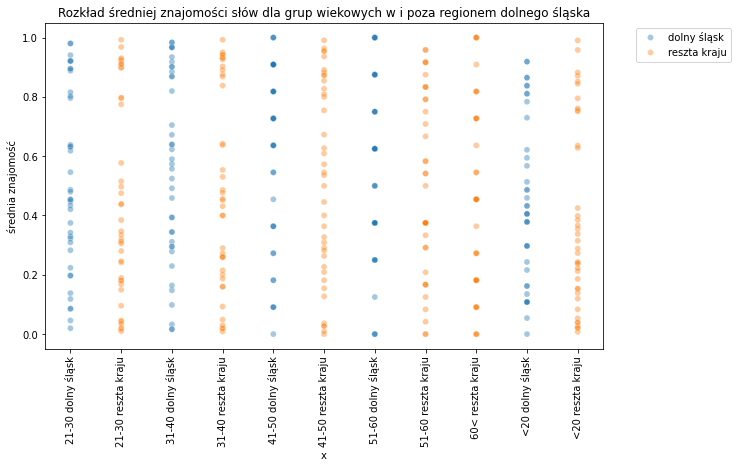

In [9]:
fig = plt.figure(figsize=(10, 6))
sns.scatterplot(data=usageToPlot, x="x", y="value", hue=isLowerSilesiaColumn, alpha=0.4)
plt.ylabel("średnia znajomość")
plt.xticks(rotation=90)
plt.title("Rozkład średniej znajomości słów dla grup wiekowych w i poza regionem dolnego śląska")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

### Exports

In [10]:
# with pd.ExcelWriter("helenka.xlsx") as writer:
#     usageGrouped.to_excel(writer, "procent uzywania")
#     knownGrouped.to_excel(writer, "procent znajomosci")